In [1]:
import subprocess
# result = subprocess.run(["python", "submit_mnist_experiment.py"], text=True, capture_output=True)
# print(result.stdout)
# print(result.stder~r)


In [6]:
import os
import subprocess

# Set the environment variable to use UTF-8 encoding
env = os.environ.copy()
env["PYTHONIOENCODING"] = "utf-8"

# Run the subprocess with the modified environment
result = subprocess.run(
    ["python", "submit_mnist_experiment.py"],
    text=True,
    capture_output=True, errors= 'ignore',
    env=env  # Pass the modified environment
)

# Print the output and error (if any)
print(result.stdout)
print(result.stderr)

d:\Maths_Y4\Project\Bayesian-Neural-Network-Project\Rebuilding_Slang
d:\Maths_Y4\Project\Bayesian-Neural-Network-Project\Rebuilding_Slang
python d:\Maths_Y4\Project\Bayesian-Neural-Network-Project\Rebuilding_Slang\run_experiment.py --name="slang_mnist_experiment" --variant="L_32" --method="SLANG_COMPLETE" --cv=0
args: Namespace(name='slang_mnist_experiment', variant='L_32', method='SLANG_COMPLETE', cv=0)
False
c:\Users\peter\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Job python d:\Maths_Y4\Project\Bayesian-Neural-Network-Project\Rebuilding_Slang\run_experiment.py --name="slang_mnist_experiment" --variant="L_32" --method="SLANG_COMPLETE" --cv=0 failed to submit
Done submitting jobs!

INFO:artemis:========== Running Experiment: slang_complete.slang_mnist_experiment.L_32 ==========
Traceback (most recent call last):

In [12]:
# result = subprocess.run(["python", "submit_mnist_experiment.py"], text=True, capture_output=True,errors ='ignore',encoding="utf-8")#,errors="ignore")
# subprocess.run(["python", "make_table_3.py"])

Rank is 388


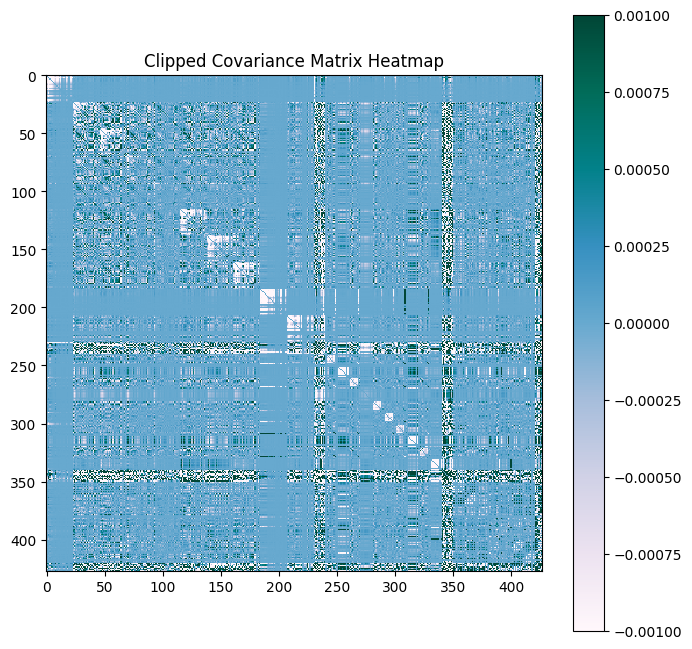

/var/folders/d5/bt4mpp9n3gngv4q0rms4ylwm0000gn/T/ipykernel_79504/1843370937.py:28: RuntimeWarning: divide by zero encountered in log
  log_cov_matrix = np.log(cov_matrix.detach().numpy())
/var/folders/d5/bt4mpp9n3gngv4q0rms4ylwm0000gn/T/ipykernel_79504/1843370937.py:28: RuntimeWarning: invalid value encountered in log
  log_cov_matrix = np.log(cov_matrix.detach().numpy())


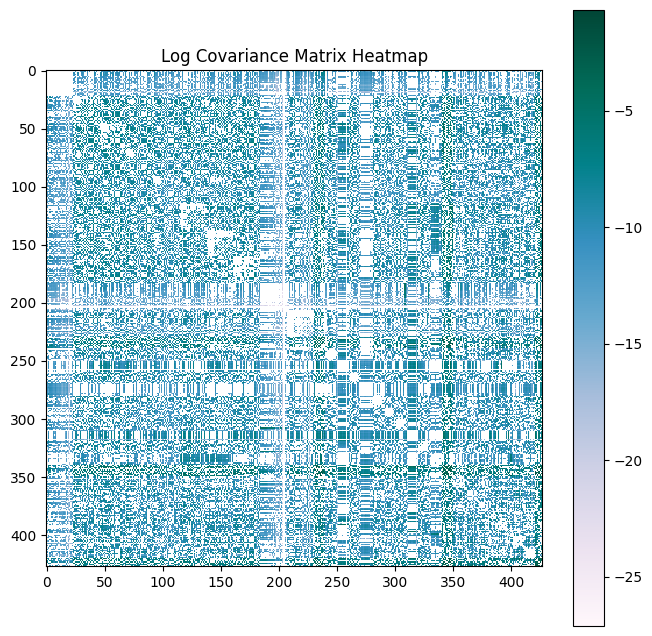

In [13]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np

with open('results_dict.pkl', 'rb') as f:
    results_dict = pickle.load(f)

param_means = results_dict['optimizer']['state']['mean']
prec_factor = results_dict['optimizer']['state']['prec_factor']
prec_diag = results_dict['optimizer']['state']['prec_diag']

cov_matrix = torch.linalg.inv(torch.diag(prec_diag.squeeze()) + prec_factor @ prec_factor.T)

print(f'Rank is {torch.linalg.matrix_rank(cov_matrix)}')

cov_matrix_zero_diag = cov_matrix.fill_diagonal_(0).detach().cpu().numpy()

threshold = 0.001
clipped_cov_matrix = np.clip(cov_matrix_zero_diag, -threshold, threshold)

plt.figure(figsize=(8, 8)) 
plt.imshow((clipped_cov_matrix), cmap='PuBuGn', interpolation='nearest') 
plt.colorbar() 
plt.title("Clipped Covariance Matrix Heatmap") 
plt.show()

log_cov_matrix = np.log(cov_matrix.detach().numpy())
plt.figure(figsize=(8, 8)) 
plt.imshow((log_cov_matrix), cmap='PuBuGn', interpolation='nearest') 
plt.colorbar() 
plt.title("Log Covariance Matrix Heatmap") 
plt.show()


In [14]:
cov_matrix = cov_matrix.detach().numpy()
print('highest variance is ' + str(np.max(cov_matrix)) + ' at ' + str(np.unravel_index(np.argmax(cov_matrix), cov_matrix.shape)))

highest variance is 0.50476444 at (np.int64(238), np.int64(308))


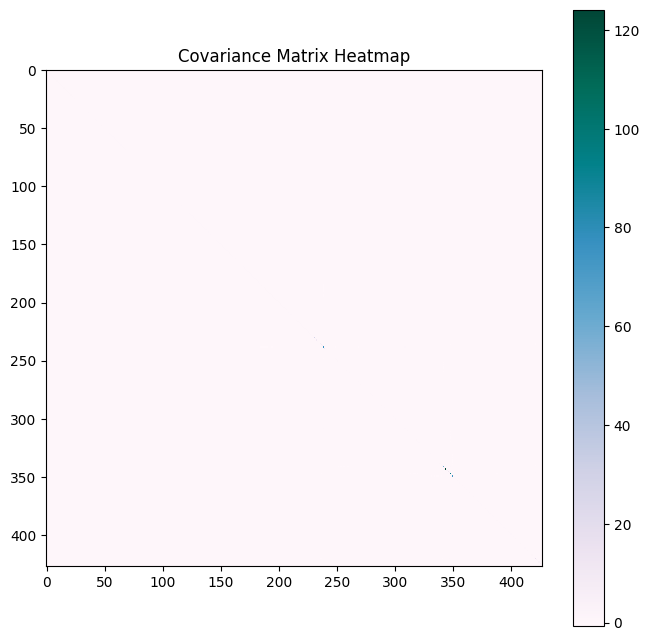

In [15]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np

with open('results_dict.pkl', 'rb') as f:
    results_dict = pickle.load(f)

param_means = results_dict['optimizer']['state']['mean']
prec_factor = results_dict['optimizer']['state']['prec_factor']
prec_diag = results_dict['optimizer']['state']['prec_diag']
D_inv = torch.diag(1/prec_diag.squeeze())
middle_term = torch.linalg.inv(torch.eye(prec_factor.size(1)) + prec_factor.T @ D_inv @ prec_factor)
cov_matrix = D_inv - D_inv @ prec_factor @ middle_term @ prec_factor.T @ D_inv
cov_matrix = cov_matrix.detach().cpu().numpy()
# cov_matrix[330:350,330:350] = np.zeros((20,20))
plt.figure(figsize=(8, 8)) 
plt.imshow((cov_matrix), cmap='PuBuGn', interpolation='nearest') 
plt.colorbar() 
plt.title("Covariance Matrix Heatmap") 
plt.show()


In [16]:
cov_matrix[100,110]

np.float32(-9.06321e-05)

In [17]:
result = subprocess.run(["python", "make_table_3.py"], capture_output=True, text=True)

# Print the standard output
print("Standard Output:")
print(result.stdout)

# Print the standard error (if any)
print("Standard Error:")
print(result.stderr)

Standard Output:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Index [1/1] Done!

Standard Error:



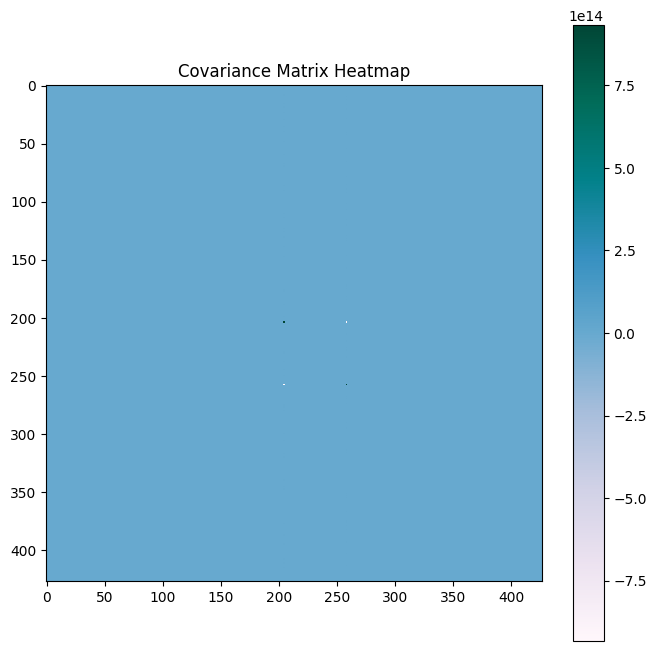

In [18]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np

with open('results_dict.pkl', 'rb') as f:
    results_dict = pickle.load(f)

param_means = results_dict['optimizer']['state']['mean']
prec_factor = results_dict['optimizer']['state']['prec_factor']
prec_diag = results_dict['optimizer']['state']['prec_diag']
cov_matrix = torch.linalg.inv(prec_factor @ prec_factor.t() + prec_diag)
cov_matrix = cov_matrix.detach().cpu().numpy()
cov_matrix[330:350,330:350] = np.zeros((20,20))
plt.figure(figsize=(8, 8)) 
plt.imshow((cov_matrix), cmap='PuBuGn', interpolation='nearest') 
plt.colorbar() 
plt.title("Covariance Matrix Heatmap") 
plt.show()


In [19]:
# # Save stdout and stderr to files
# with open('output.txt', 'w') as f:
#     f.write("Standard Output:\n")
#     f.write(result.stdout)

# with open('error.txt', 'w') as f:
#     f.write("Standard Error:\n")
#     f.write(result.stderr)

In [20]:
# with open('training_output.txt', 'w') as f:
#     f.write("Arguments:\n")
#     f.write(f"{result.args}\n\n")

#     f.write("Return Code:\n")
#     f.write(f"{result.returncode}\n\n")

#     f.write("Standard Output:\n")
#     f.write(result.stdout)

#     f.write("\nStandard Error:\n")
#     f.write(result.stderr)
import os
cmd = "pwd" if os.name != "nt" else "cd"
subprocess.call(cmd, shell=True)
basedir = os.path.dirname(os.path.abspath(__file__))
print(basedir)

/Users/patrickgunn/Documents/Documents - iCloud Drive/Uni Fourth Year/Full Year/Group Project/Bayesian-Neural-Network-Project/Rebuilding_Slang


NameError: name '__file__' is not defined

In [ ]:
result = subprocess.run(['python', 'base.py'], capture_output=True, text=True)
# result = subprocess.run(["python", "make_table_3.py"], capture_output=True, text=True)
result.stdout

'd:\\Maths_Y4\\Project\\Bayesian-Neural-Network-Project\\Rebuilding_Slang\n'

In [ ]:
command = "python "+os.path.join(basedir, 'run_experiment.py')+" --name=\"" + str(name) + "\" --variant=\"" + str(variant) + "\" --method=\"" + str(method) + "\" --cv=" + str(cv)
        print(command)
exit_status = subprocess.call(['python','d:\\Maths_Y4\\Project\\Bayesian-Neural-Network-Project\\Rebuilding_Slang\run_experiment.py',
                               ' --name=\"SLANG\"',' --variant= \"\"', ' --method=\"\"']
                              , shell=True)

submit_python_jobs(experiment_name, variants, method='SLANG_COMPLETE', cv=0)
